In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Getting the data
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
len(heart_disease)

303

In [5]:
# Clearning the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Splitting data into 2 segments of train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
len(X_train), len(X_test)

(242, 61)

In [7]:
# Instantiate the model
clf = RandomForestClassifier().fit(X_train, y_train)

# Test data on known datasets
clf.score(X_train, y_train)

1.0

In [8]:
# Test data on unknown datasets
clf.score(X_test, y_test)

0.8032786885245902

In [9]:
# Save model
dump(clf, "research.joblib")

['research.joblib']

In [10]:
# Load the saved model
saved_clf = load("research.joblib")
clf.score(X_test, y_test)

0.8032786885245902

In [11]:
# Get predictions
y_pred = clf.predict(X_test)

In [12]:
# Reindex the new dataframe created from unseen data
new_df = pd.DataFrame(X_test.reset_index(drop=True))
new_df["target"] = pd.Series(y_pred)

In [13]:
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57,1,0,165,289,1,0,124,0,1.0,1,3,3,0
1,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
2,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1
3,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
4,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1


In [19]:
len(new_df)

61

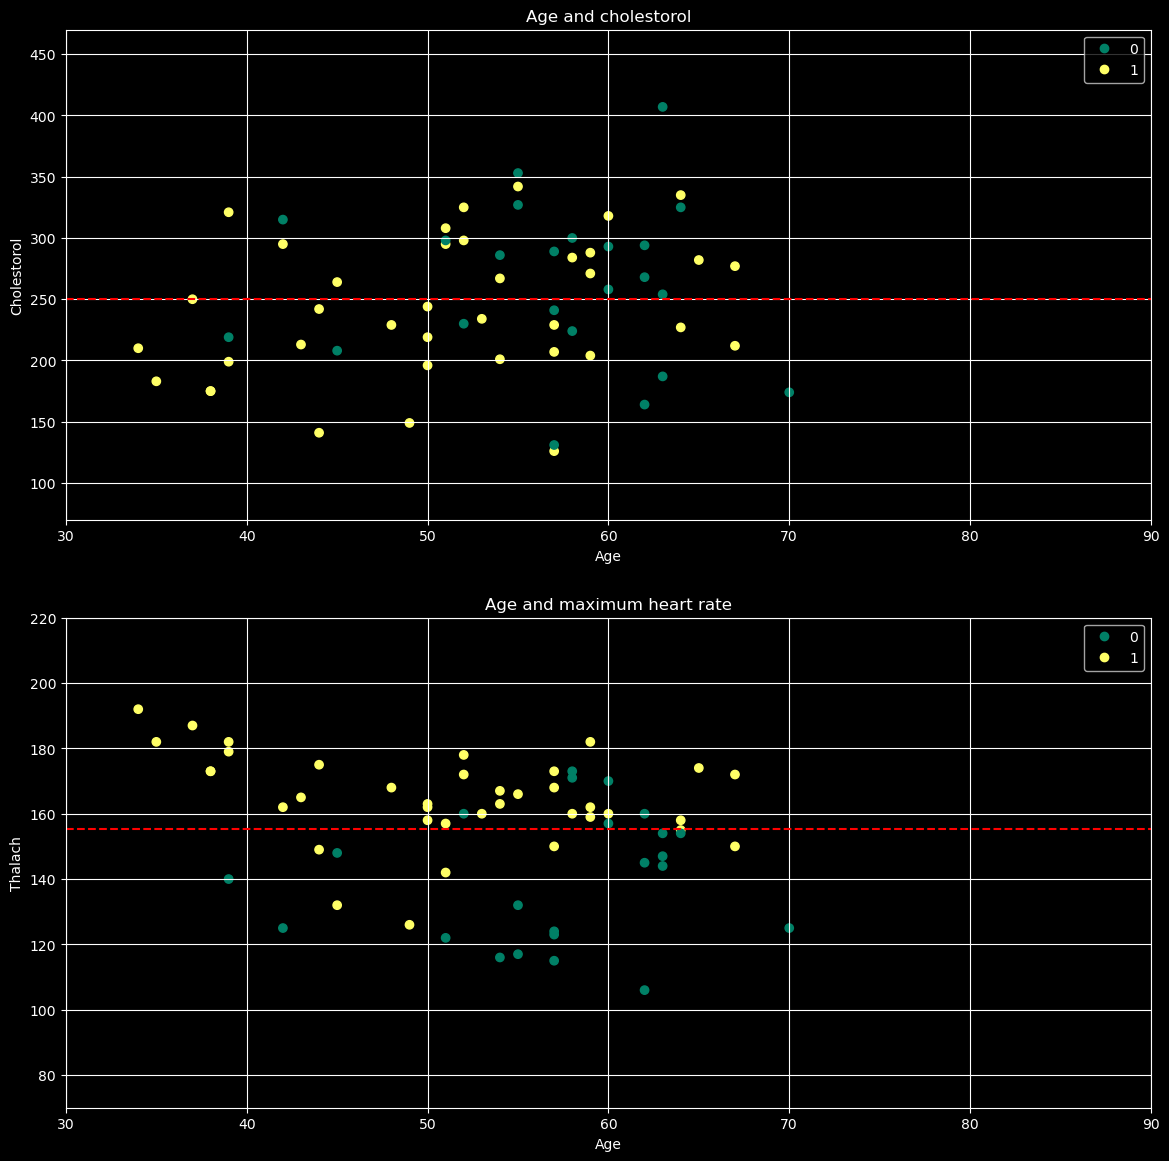

In [18]:
# Plot the new data

plt.style.use('dark_background')

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 14))
ax1_scatter = ax1.scatter(new_df["age"], new_df["chol"], c=new_df["target"], cmap="summer")
ax1.set(xlabel="Age", ylabel="Cholestorol", 
        title="Age and cholestorol",
       xlim=[30, 90], ylim=[70, 470])
ax1.legend(*ax1_scatter.legend_elements())
ax1.grid()
ax1.axhline(new_df["chol"].mean(), linestyle="--", c="red")

ax2_scatter = ax2.scatter(new_df["age"], new_df["thalach"], c=new_df["target"], cmap="summer")
ax2.set(xlabel="Age", ylabel="Thalach", title="Age and maximum heart rate",
       xlim=[30, 90], ylim=[70, 220], fontsize=)
ax2.legend(*ax2_scatter.legend_elements())
ax2.grid()
ax2.axhline(new_df["thalach"].mean(), linestyle="--", c="red");

# Regression model

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [40]:
cali_fetch = fetch_california_housing()
df = pd.DataFrame(cali_fetch["data"], columns=cali_fetch["feature_names"])
df["target"] = pd.Series(cali_fetch["target"])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
len(df)

20640

In [5]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor().fit(X_train, y_train)
model.score(X_train, y_train)

0.9732725265776497

In [6]:
model.score(X_test, y_test)

0.811932801580044

In [7]:
new_df = pd.DataFrame(X_test.reset_index(drop=True))
new_df["target"] = pd.Series(model.predict(X_test))

In [8]:
new_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,3.6027,17.0,6.162252,1.109272,1561.0,2.584437,32.87,-116.93,1.829240
1,5.0762,26.0,5.556522,1.146584,1518.0,1.885714,34.05,-118.40,4.473365
2,2.1458,22.0,3.078261,1.052174,530.0,4.608696,36.72,-119.78,0.709060
3,6.2182,30.0,5.982249,1.065089,1440.0,2.840237,37.32,-122.06,3.511890
4,11.0567,5.0,9.636036,1.187387,1862.0,3.354955,33.60,-117.58,4.880176


In [9]:
from sklearn.neural_network import MLPRegressor

In [10]:
ml_clf = MLPRegressor(max_iter=1000).fit(X_train, y_train)
ml_clf.score(X_train, y_train)

0.5229506264148731

In [11]:
ml_clf.score(X_test, y_test)

0.5574862743413209

In [41]:
second_df = df[:500]

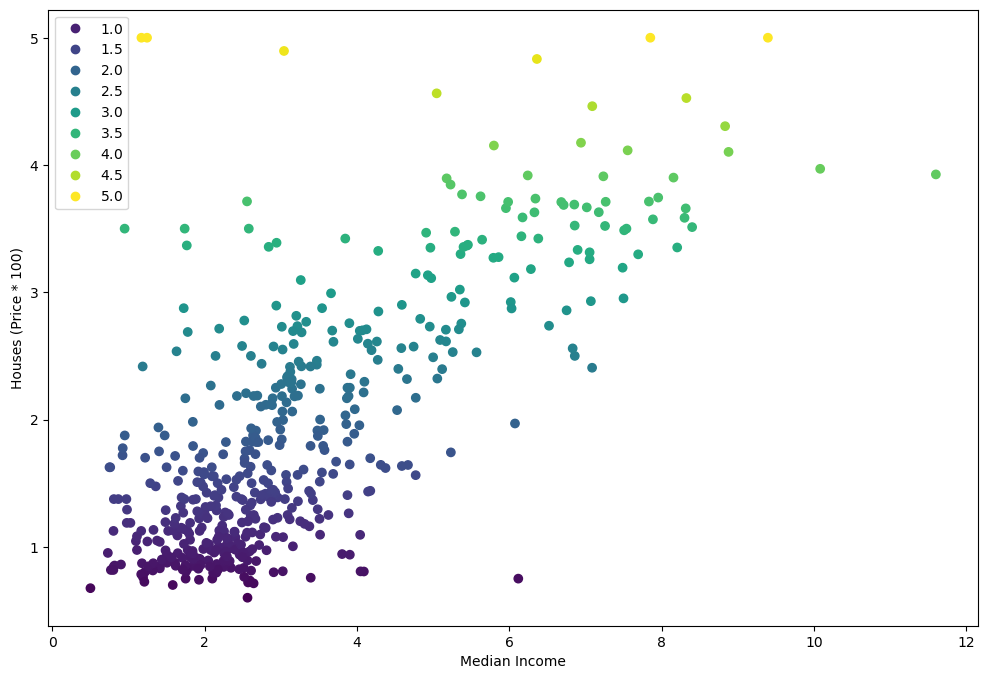

In [42]:
_, ax = plt.subplots(figsize=(12, 8));
ax_scatter = ax.scatter(second_df["MedInc"], second_df["target"], c=second_df["target"])
ax.legend(*ax_scatter.legend_elements())
ax.set(xlabel="Median Income", ylabel="Houses (Price * 100)");

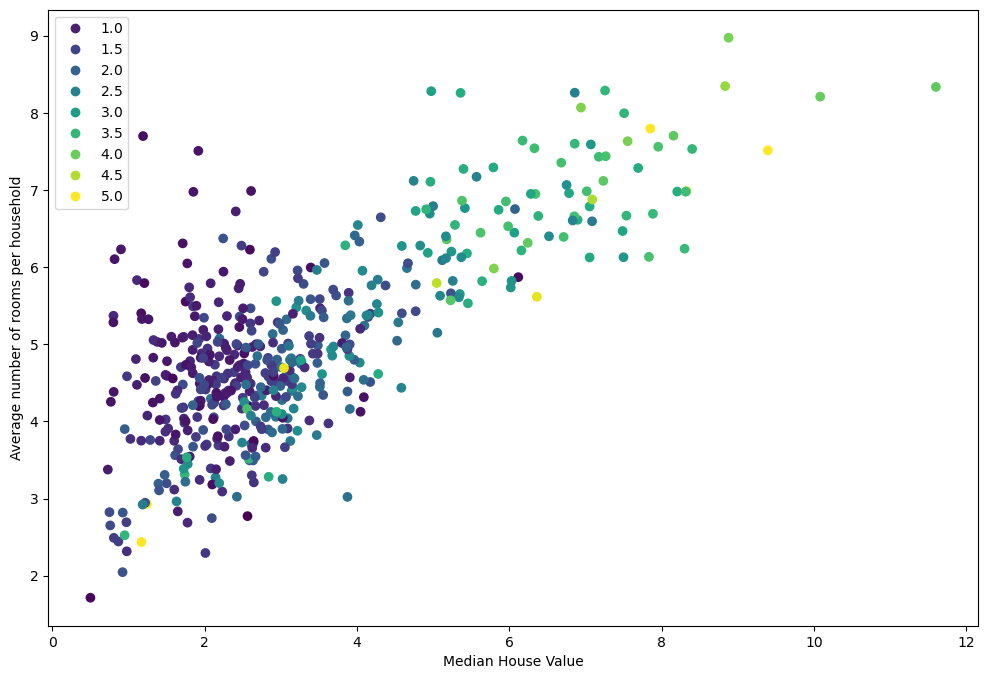

In [49]:
_, ax = plt.subplots(figsize=(12, 8))

ax_scatter = plt.scatter(second_df["MedInc"], second_df["AveRooms"], c=second_df["target"])
ax.legend(*ax_scatter.legend_elements())
ax.set(ylabel="Average number of rooms per household", xlabel="Median House Value");

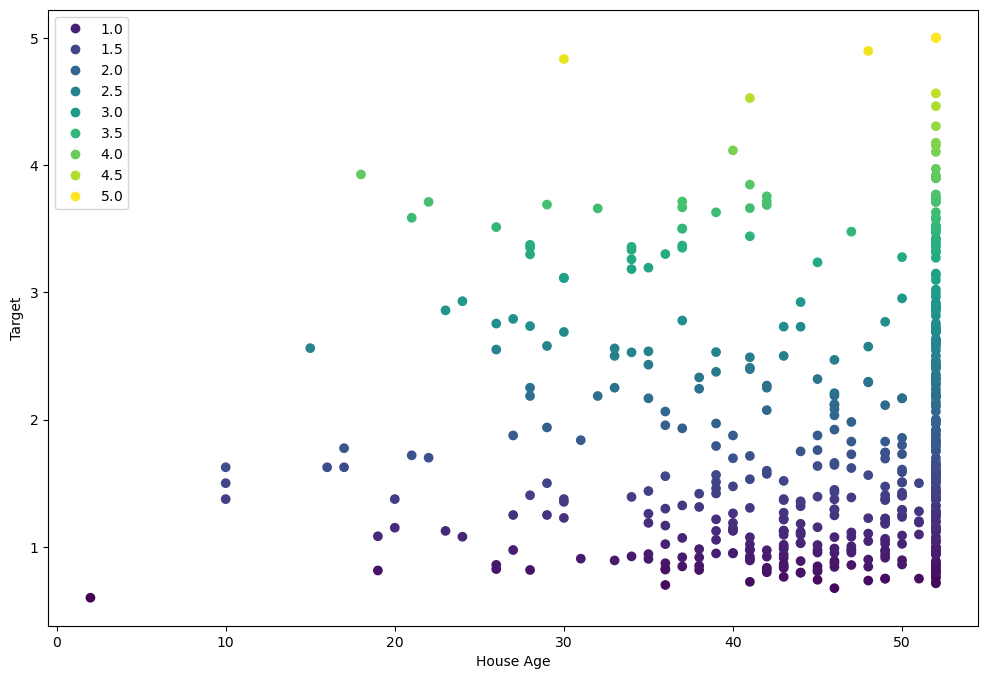

In [58]:
_, ax = plt.subplots(figsize=(12, 8))
ax_scatter = plt.scatter(second_df["HouseAge"], second_df["target"], c=second_df["target"])
ax.legend(*ax_scatter.legend_elements())
ax.set(xlabel="House Age", ylabel="Target");